In [1]:
# Loading in modules:
import os
import pandas as pd
import numpy as np 
from pandas.plotting import scatter_matrix

In [2]:
print("Current directory is:", os.getcwd())

Current directory is: C:\Users\cderf\OneDrive\Documents\RepositoriesIntDataVis\DATA71200\Project 1


In [4]:
data = pd.read_csv('asteroiddata.csv')

In [6]:
print(data.dtypes)
print(data.isna().sum())

id                 object
spkid               int64
full_name          object
pdes               object
name               object
prefix             object
neo                object
pha                object
H                 float64
diameter          float64
albedo            float64
diameter_sigma    float64
orbit_id           object
epoch             float64
epoch_mjd           int64
epoch_cal         float64
equinox            object
e                 float64
a                 float64
q                 float64
i                 float64
om                float64
w                 float64
ma                float64
ad                float64
n                 float64
tp                float64
tp_cal            float64
per               float64
per_y             float64
moid              float64
moid_ld           float64
sigma_e           float64
sigma_a           float64
sigma_q           float64
sigma_i           float64
sigma_om          float64
sigma_w           float64
sigma_ma    

In [7]:
# We see that most of our features contain missing values. I will substitute these with their median value
# We can also drop columns that identify each asteroid i.e. their 'name', 'full_name', 'id', 'pdes', and 'prefix'
# Floats with missing values will be substitued with their median values - this includes 'H', 'diameter', 'albedo',
# 'diameter_sigma', 'ma', 'ad', 'per', 'per_y', 'moid' through 'sigma_per', and 'rms'

In [8]:
X_num = data.drop(['name', 'id', 'pdes', 'prefix', 'full_name','neo', 'pha', 'orbit_id', 'equinox', 'class'], axis=1)
print(X_num.dtypes)
print(X_num.isna().sum())

spkid               int64
H                 float64
diameter          float64
albedo            float64
diameter_sigma    float64
epoch             float64
epoch_mjd           int64
epoch_cal         float64
e                 float64
a                 float64
q                 float64
i                 float64
om                float64
w                 float64
ma                float64
ad                float64
n                 float64
tp                float64
tp_cal            float64
per               float64
per_y             float64
moid              float64
moid_ld           float64
sigma_e           float64
sigma_a           float64
sigma_q           float64
sigma_i           float64
sigma_om          float64
sigma_w           float64
sigma_ma          float64
sigma_ad          float64
sigma_n           float64
sigma_tp          float64
sigma_per         float64
rms               float64
dtype: object
spkid                  0
H                   6263
diameter          822315
a

In [9]:
X_cat = data.drop(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'H', 'diameter', 'albedo', 'diameter_sigma', 
                  'epoch', 'epoch_mjd', 'epoch_cal', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal',
                  'per', 'per_y', 'moid', 'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
                  'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'rms', 'equinox'], axis=1)
print(X_cat)
print(X_cat.isna().sum())

       neo pha orbit_id class
0        N   N   JPL 47   MBA
1        N   N   JPL 37   MBA
2        N   N  JPL 112   MBA
3        N   N   JPL 35   MBA
4        N   N  JPL 114   MBA
...     ..  ..      ...   ...
958519   N   N    JPL 5   MBA
958520   N   N        8   MBA
958521   Y   Y       17   APO
958522   N   N    JPL 3   MBA
958523   N   N    JPL 3   MBA

[958524 rows x 4 columns]
neo             4
pha         19921
orbit_id        0
class           0
dtype: int64


In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="median")

In [11]:
imputer.fit(X_num)

SimpleImputer(strategy='median')

In [12]:
X = imputer.transform(X_num)
X_transformed = pd.DataFrame(X, columns=X_num.columns)
print(X_transformed.isna().sum())

spkid             0
H                 0
diameter          0
albedo            0
diameter_sigma    0
epoch             0
epoch_mjd         0
epoch_cal         0
e                 0
a                 0
q                 0
i                 0
om                0
w                 0
ma                0
ad                0
n                 0
tp                0
tp_cal            0
per               0
per_y             0
moid              0
moid_ld           0
sigma_e           0
sigma_a           0
sigma_q           0
sigma_i           0
sigma_om          0
sigma_w           0
sigma_ma          0
sigma_ad          0
sigma_n           0
sigma_tp          0
sigma_per         0
rms               0
dtype: int64


In [19]:
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(X_transformed, test_size=0.2, random_state=42)

In [20]:
test_set.head()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
323650,2323651.0,18.2,3.972,0.079,0.332,2459000.5,59000.0,20200531.0,0.139451,2.268877,...,1.051400e-07,0.000005,0.000134,0.000138,0.000034,1.785700e-08,2.987900e-09,0.000114,0.000013,0.73452
571724,3242421.0,17.7,3.972,0.079,0.332,2459000.5,59000.0,20200531.0,0.245938,2.572391,...,5.816900e-07,0.000006,0.000062,0.000075,0.000047,5.644400e-08,6.310600e-09,0.000198,0.000040,0.59010
395983,2395984.0,17.4,3.972,0.079,0.332,2459000.5,59000.0,20200531.0,0.112879,2.714802,...,2.618600e-07,0.000009,0.000113,0.000119,0.000041,5.827700e-08,6.375200e-09,0.000191,0.000047,0.47752
235862,2235863.0,15.1,6.539,0.045,0.282,2459000.5,59000.0,20200531.0,0.175246,3.113143,...,2.068300e-07,0.000006,0.000034,0.000041,0.000029,5.184000e-08,3.813600e-09,0.000174,0.000043,0.56332
651830,3445579.0,17.3,3.972,0.079,0.332,2459000.5,59000.0,20200531.0,0.181327,2.753819,...,1.077800e-06,0.000009,0.000081,0.000114,0.000069,5.354400e-08,5.324700e-09,0.000334,0.000041,0.61287


In [21]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 766819 entries, 307413 to 121958
Data columns (total 35 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   spkid           766819 non-null  float64
 1   H               766819 non-null  float64
 2   diameter        766819 non-null  float64
 3   albedo          766819 non-null  float64
 4   diameter_sigma  766819 non-null  float64
 5   epoch           766819 non-null  float64
 6   epoch_mjd       766819 non-null  float64
 7   epoch_cal       766819 non-null  float64
 8   e               766819 non-null  float64
 9   a               766819 non-null  float64
 10  q               766819 non-null  float64
 11  i               766819 non-null  float64
 12  om              766819 non-null  float64
 13  w               766819 non-null  float64
 14  ma              766819 non-null  float64
 15  ad              766819 non-null  float64
 16  n               766819 non-null  float64
 17  tp   

In [16]:
training_set.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,7.668190e+05,766819.000000,766819.000000,766819.000000,766819.000000,7.668190e+05,766819.000000,7.668190e+05,766819.000000,766819.000000,...,7.668190e+05,7.668190e+05,7.668190e+05,7.668190e+05,7.668190e+05,7.668190e+05,7.668190e+05,7.668190e+05,7.668190e+05,766819.000000
mean,3.805688e+06,16.905468,4.191233,0.086297,0.353029,2.458869e+06,58868.675081,2.019692e+07,0.156090,2.872380,...,2.170886e+01,1.112591e+00,5.366519e+00,1.592203e+06,1.592141e+06,2.266399e+01,5.192788e-02,5.027389e+08,8.435914e+04,0.561776
std,6.816356e+06,1.785149,3.560856,0.045215,0.318180,7.015287e+02,701.528685,1.929857e+04,0.092560,20.640354,...,3.117094e+03,1.274095e+02,1.432383e+03,1.012876e+09,1.012876e+09,7.921943e+03,1.068458e+01,3.265938e+11,2.911480e+07,3.069240
min,2.000002e+06,-1.100000,0.008000,0.001000,0.001000,2.428098e+06,28097.000000,1.935102e+07,0.000000,-14702.447872,...,2.616800e-10,4.087800e-08,2.163900e-07,1.789300e-07,2.103800e-07,5.572900e-11,2.860900e-11,3.088400e-07,2.335200e-08,0.000000
25%,2.239660e+06,16.100000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.092215,2.387964,...,1.475600e-07,6.141600e-06,3.667250e-05,5.829950e-05,2.607500e-05,2.373850e-08,2.799900e-09,1.126800e-04,1.820800e-05,0.518020
50%,2.479175e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145046,2.646944,...,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752242e+06,17.700000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.200667,3.001873,...,6.180000e-07,1.553400e-05,1.567200e-04,2.970700e-04,1.619500e-04,1.141400e-07,1.075650e-08,7.686100e-04,9.344650e-05,0.613840
max,5.401723e+07,33.200000,900.000000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,8850.823836,...,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


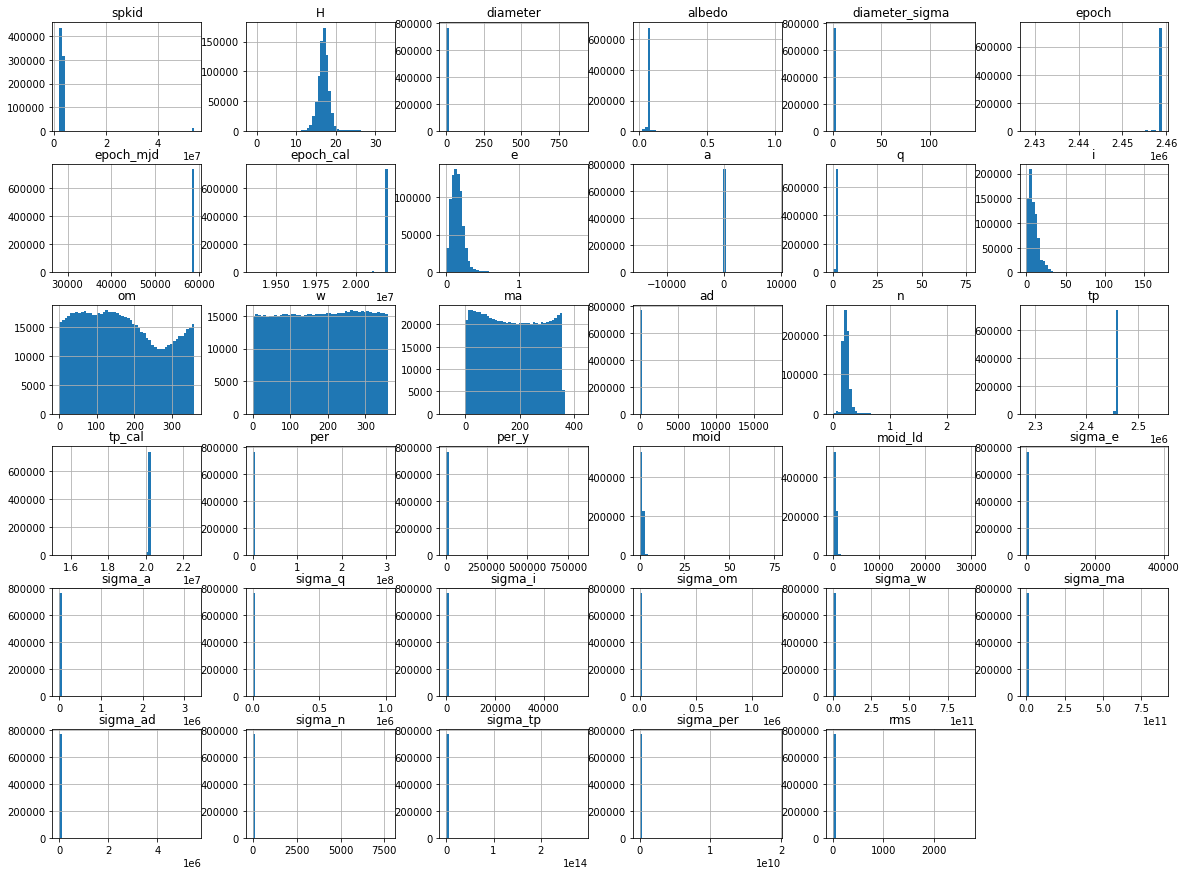

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
training_set.style.use('ggplot')
training_set.hist(bins=50, figsize=(20,15))
plt.show()

array([[<AxesSubplot:xlabel='spkid', ylabel='spkid'>,
        <AxesSubplot:xlabel='H', ylabel='spkid'>,
        <AxesSubplot:xlabel='e', ylabel='spkid'>,
        <AxesSubplot:xlabel='i', ylabel='spkid'>,
        <AxesSubplot:xlabel='om', ylabel='spkid'>,
        <AxesSubplot:xlabel='w', ylabel='spkid'>,
        <AxesSubplot:xlabel='ma', ylabel='spkid'>,
        <AxesSubplot:xlabel='n', ylabel='spkid'>],
       [<AxesSubplot:xlabel='spkid', ylabel='H'>,
        <AxesSubplot:xlabel='H', ylabel='H'>,
        <AxesSubplot:xlabel='e', ylabel='H'>,
        <AxesSubplot:xlabel='i', ylabel='H'>,
        <AxesSubplot:xlabel='om', ylabel='H'>,
        <AxesSubplot:xlabel='w', ylabel='H'>,
        <AxesSubplot:xlabel='ma', ylabel='H'>,
        <AxesSubplot:xlabel='n', ylabel='H'>],
       [<AxesSubplot:xlabel='spkid', ylabel='e'>,
        <AxesSubplot:xlabel='H', ylabel='e'>,
        <AxesSubplot:xlabel='e', ylabel='e'>,
        <AxesSubplot:xlabel='i', ylabel='e'>,
        <AxesSubplot:xlabel='o

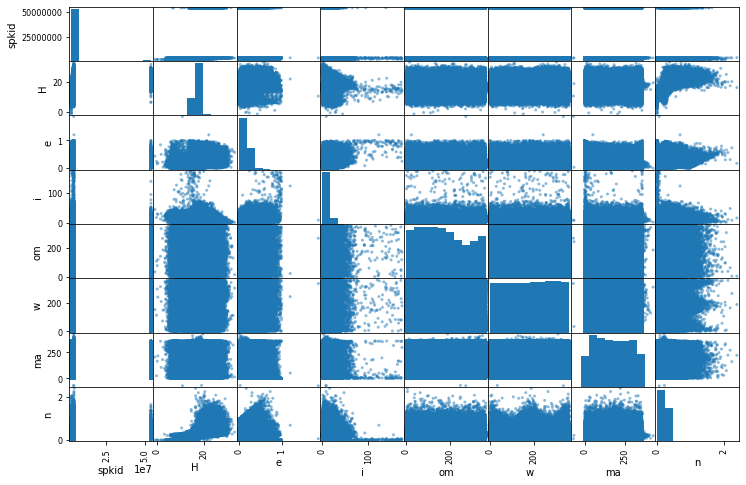

In [23]:
from pandas.plotting import scatter_matrix

attributes = ["spkid", "H", "e",
              "i", "om", "w", "ma", "n"]
scatter_matrix(training_set[attributes], figsize=(12, 8))

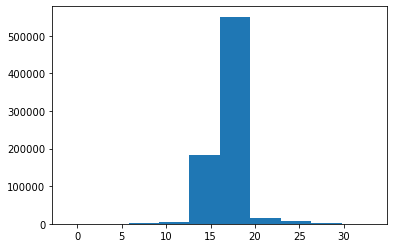

In [25]:
# Here I apply the transformations to the two categories I believe are the most significant
# squaring, cubing, logarithmic, and exponential transformations are applied to the variables 'H' and 'e' - 

# APPLYING TRANSFORMATIONS TO H:

plt.hist(training_set['H'].values.reshape(-1, 1))
plt.show()

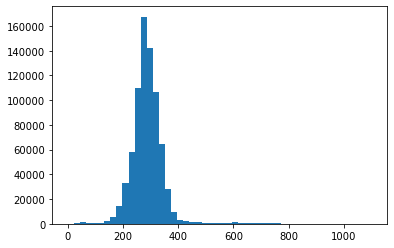

In [33]:
plt.hist(training_set['H'].values.reshape(-1, 1)**2, bins=50)
plt.show()

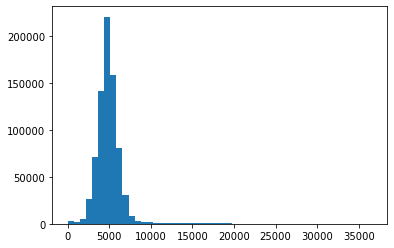

In [31]:
plt.hist(training_set['H'].values.reshape(-1, 1)**3, bins=50)
plt.show()

<ipython-input-37-ab05468b60e8>:1: RuntimeWarning: invalid value encountered in log
  plt.hist(np.log(training_set['H'].values.reshape(-1, 1)), bins=50)


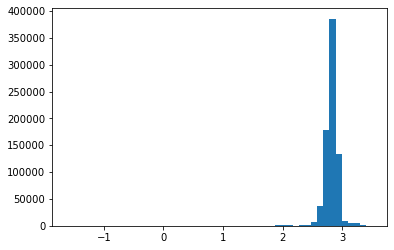

In [37]:
plt.hist(np.log(training_set['H'].values.reshape(-1, 1)), bins=50)
plt.show()

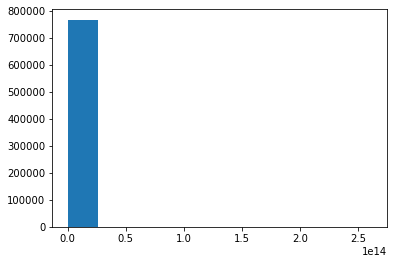

In [41]:
plt.hist(np.exp(training_set['H'].values.reshape(-1, 1)), bins=10)
plt.show()

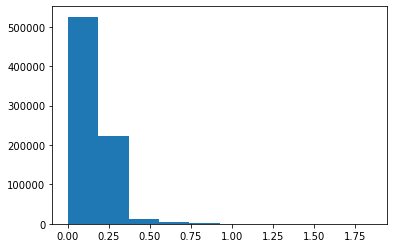

In [42]:
# APPLYING TRANSFORMATIONS TO 'e' -

plt.hist(training_set['e'].values.reshape(-1, 1))
plt.show()

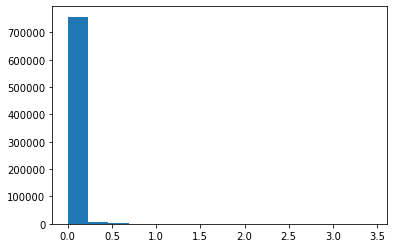

In [45]:
plt.hist(training_set['e'].values.reshape(-1, 1)**2, bins=15)
plt.show()

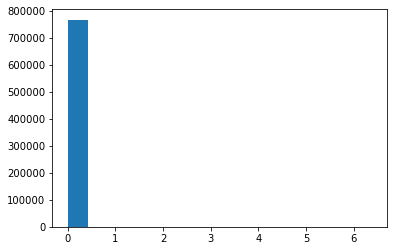

In [56]:
plt.hist(training_set['e'].values.reshape(-1, 1)**3, bins=15)
plt.show()

<ipython-input-48-d8a74326c443>:1: RuntimeWarning: divide by zero encountered in log
  plt.hist(np.log(training_set['e'].values.reshape(-1, 1)), bins=10)


ValueError: supplied range of [-inf, 0.6180764871035171] is not finite

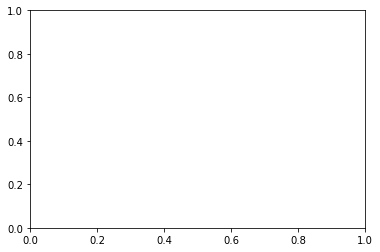

In [48]:
plt.hist(np.log(training_set['e'].values.reshape(-1, 1)), bins=10)
plt.show()

In [49]:
# running the natural log was not computed 

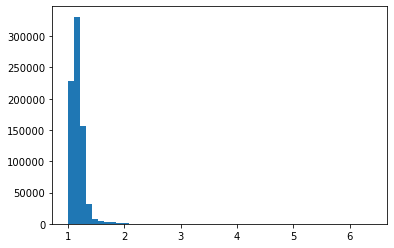

In [52]:
plt.hist(np.exp(training_set['e'].values.reshape(-1, 1)), bins=50)
plt.show()

array([[<AxesSubplot:xlabel='H', ylabel='H'>,
        <AxesSubplot:xlabel='e', ylabel='H'>],
       [<AxesSubplot:xlabel='H', ylabel='e'>,
        <AxesSubplot:xlabel='e', ylabel='e'>]], dtype=object)

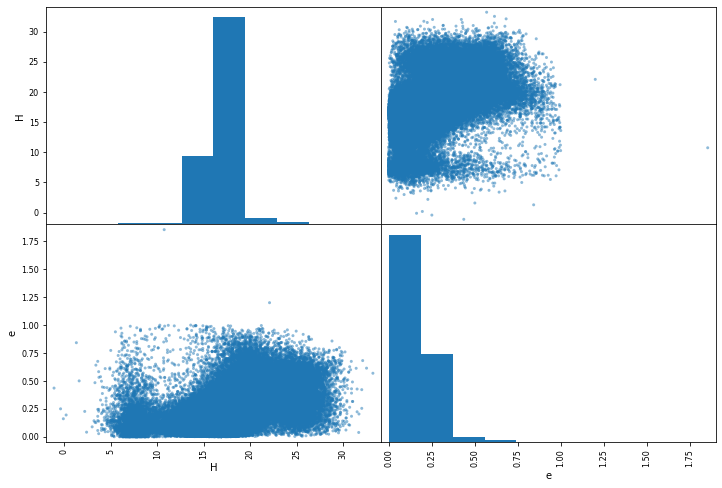

In [58]:
attributes = ["H", "e"]
scatter_matrix(training_set[attributes], figsize=(12, 8))

array([[<AxesSubplot:xlabel='H', ylabel='H'>,
        <AxesSubplot:xlabel='e', ylabel='H'>],
       [<AxesSubplot:xlabel='H', ylabel='e'>,
        <AxesSubplot:xlabel='e', ylabel='e'>]], dtype=object)

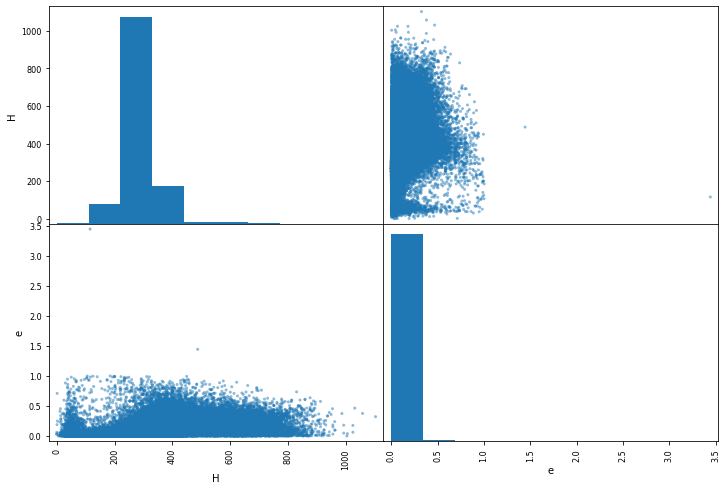

In [59]:
scatter_matrix(training_set[attributes]**2, figsize=(12, 8))

array([[<AxesSubplot:xlabel='H', ylabel='H'>,
        <AxesSubplot:xlabel='e', ylabel='H'>],
       [<AxesSubplot:xlabel='H', ylabel='e'>,
        <AxesSubplot:xlabel='e', ylabel='e'>]], dtype=object)

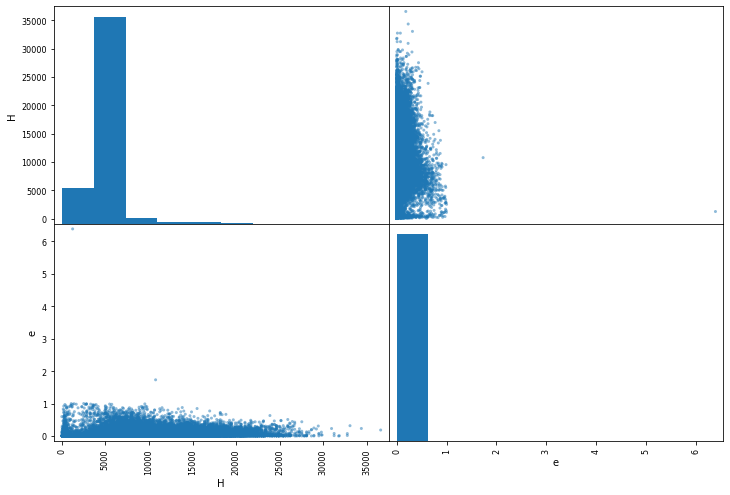

In [60]:
scatter_matrix(training_set[attributes]**3, figsize=(12, 8))

In [61]:
# DATA TAKEN FROM
# https://www.kaggle.com/sakhawat18/asteroid-dataset